### Load tensorflow

In [1]:
import tensorflow as tf

### Collect Data

In [2]:
#MNIST Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
#Number of training examples
X_train.shape

(60000, 28, 28)

In [5]:
#Test examples
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

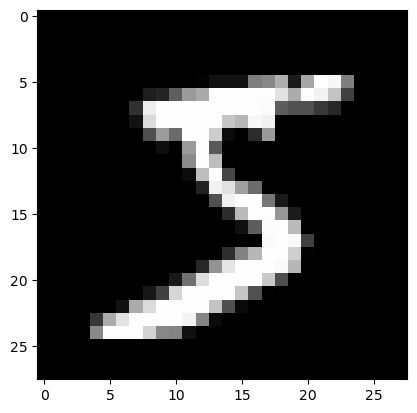

In [9]:
#Lets print the image as well
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [10]:
print(y_train[0])

5


### Convert Output label to multiple values

In [11]:
print('First example label: ', y_train[0])

First example label:  5


In [12]:
#One hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [13]:
print('First example label: ', y_train[0])

First example label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Build the Graph

In [14]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1 Max


2024-03-09 07:08:18.384979: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-09 07:08:18.385289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Execute the Graph

In [15]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=100,
          batch_size=X_train.shape[0])

Epoch 1/100


2024-03-09 07:08:19.006393: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-09 07:08:19.118248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 2.7291 - accuracy: 0.1155 - val_loss: 15.2183 - val_accuracy: 0.1395
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.6443 - accuracy: 0.1291

2024-03-09 07:08:21.437577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 81ms/step - loss: 2.6443 - accuracy: 0.1291 - val_loss: 10.4234 - val_accuracy: 0.1565
Epoch 3/100
1/1 [==============================] - 0s 61ms/step - loss: 2.5634 - accuracy: 0.1446 - val_loss: 8.1914 - val_accuracy: 0.1742
Epoch 4/100
1/1 [==============================] - 0s 67ms/step - loss: 2.4862 - accuracy: 0.1595 - val_loss: 6.8249 - val_accuracy: 0.1893
Epoch 5/100
1/1 [==============================] - 0s 66ms/step - loss: 2.4126 - accuracy: 0.1754 - val_loss: 5.8778 - val_accuracy: 0.2040
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 2.3424 - accuracy: 0.1942 - val_loss: 5.1726 - val_accuracy: 0.2211
Epoch 7/100
1/1 [==============================] - 0s 69ms/step - loss: 2.2755 - accuracy: 0.2152 - val_loss: 4.6227 - val_accuracy: 0.2333
Epoch 8/100
1/1 [==============================] - 0s 69ms/step - loss: 2.2118 - accuracy: 0.2373 - val_loss: 4.1798 - val_accuracy: 0.2486
Epoch 9/100
1/1 [==============

In [16]:
X_train.shape[0]

60000

In [17]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=200,
          initial_epoch=100,
          batch_size=32)

Epoch 101/200


2024-03-09 07:09:23.978598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 21s 11ms/step - loss: 0.4353 - accuracy: 0.8736 - val_loss: 0.3617 - val_accuracy: 0.9015
Epoch 102/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3512 - accuracy: 0.8982 - val_loss: 0.3593 - val_accuracy: 0.9086
Epoch 103/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3339 - accuracy: 0.9042 - val_loss: 0.3537 - val_accuracy: 0.9133
Epoch 104/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3234 - accuracy: 0.9070 - val_loss: 0.4196 - val_accuracy: 0.9139
Epoch 105/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3181 - accuracy: 0.9095 - val_loss: 0.5000 - val_accuracy: 0.9152
Epoch 106/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3116 - accuracy: 0.9121 - val_loss: 0.4323 - val_accuracy: 0.9169
Epoch 107/200
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3084 - accuracy: 0.9129 - val_loss: 0

In [185]:
model.get_weights()

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.9998432 , 0.99884903, 0.99899113,
        1.0004718 , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.0005118 , 0.99886006, 0.9991931 ,
        1.0001991 , 0.9980495 , 1.0000373 , 0.99774104, 0.9973873 ,
        1.0002329 , 1.0001159 , 0.9998    , 0.9969254 , 0.9965616 ,
        0.9973341 , 0.999748  , 0.99769664, 1.0001926 , 0.9990932 ,
        0.9983835 , 0.99959093, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.0001888 , 0.9995815 ,
        0.99965197, 0.9997741 , 0.9974911 , 0.9991169 , 0.9971577 ,
        0.998243  , 1.0016098 , 0.9987034 , 1.000537  , 1.0020927 ,
        1.000361  , 1.0013663 , 0.9964042 , 0.99

In [186]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_10 (Reshape)        (None, 784)               0         
                                                                 
 batch_normalization_10 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Save model

In [187]:
model.save('mnist_lc.h5')

In [188]:
!ls -l 

total 2784
-rw-r--r--@ 1 vidyadharbendre  staff  529649 Feb 22 00:34 01_linear_vs_non_linear.ipynb
-rw-------@ 1 vidyadharbendre  staff    2821 Feb 25  2022 1. Tensorflow_Hello_World_tf2.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff   90243 Mar  8 10:02 1_Tensorflow_basics.ipynb
-rw-r--r--@ 1 vidyadharbendre  staff    3004 Feb 17 20:50 1_tensorflow.ipynb
-rw-------@ 1 vidyadharbendre  staff   20788 Feb 21 23:41 2a. Boston Housing Prices.ipynb
-rw-------@ 1 vidyadharbendre  staff   16977 Feb 21 23:43 2b. Boston Housing Prices_Normalization.ipynb
-rw-------@ 1 vidyadharbendre  staff   30691 Mar  8 23:35 3. Boston_Housing_Prices_KERAS.ipynb
-rw-------@ 1 vidyadharbendre  staff  121544 Mar  9 07:03 4. Classification_MNIST_Logistic_Keras.ipynb
-rw-------@ 1 vidyadharbendre  staff    3231 Feb 21 21:00 5. Classification_MNIST_Logistic_Keras_batching.ipynb
-rw-------@ 1 vidyadharbendre  staff   12431 Feb 21 21:00 6. Classification_MNIST_DNN_Keras.ipynb
-rw-------@ 1 vidyadharbendre  staff   15121

In [ ]:
# !pip install hpy5